In [1]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle
import numpy as np

In [2]:
with open("h0_kernel_train.pkl", "rb") as f:
    h0_kernel_train = pickle.load(f)
with open("h0_kernel_test.pkl", "rb") as f:
    h0_kernel_test = pickle.load(f)
with open("h1_kernel_train.pkl", "rb") as f:
    h1_kernel_train = pickle.load(f)
with open("h1_kernel_test.pkl", "rb") as f:
    h1_kernel_test = pickle.load(f)
with open("h0_complete_kernel_train.pkl", "rb") as f:
    h0_complete_kernel_train = pickle.load(f)
with open("h0_complete_kernel_test.pkl", "rb") as f:
    h0_complete_kernel_test = pickle.load(f)
with open("train_y.pkl", "rb") as f:
    y_train = pickle.load(f)
with open("test_y.pkl", "rb") as f:
    y_test = pickle.load(f)
with open("train_h0sr.pkl", "rb") as f:
    train_h0sr = pickle.load(f)
with open("test_h0sr.pkl", "rb") as f:
    test_h0sr = pickle.load(f)
with open("train_h1sr.pkl", "rb") as f:
    train_h1sr = pickle.load(f)
with open("test_h1sr.pkl", "rb") as f:
    test_h1sr = pickle.load(f)
with open("train_h0sr_complete.pkl", "rb") as f:
    train_h0sr_complete = pickle.load(f)
with open("test_h0sr_complete.pkl", "rb") as f:
    test_h0sr_complete = pickle.load(f)
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)



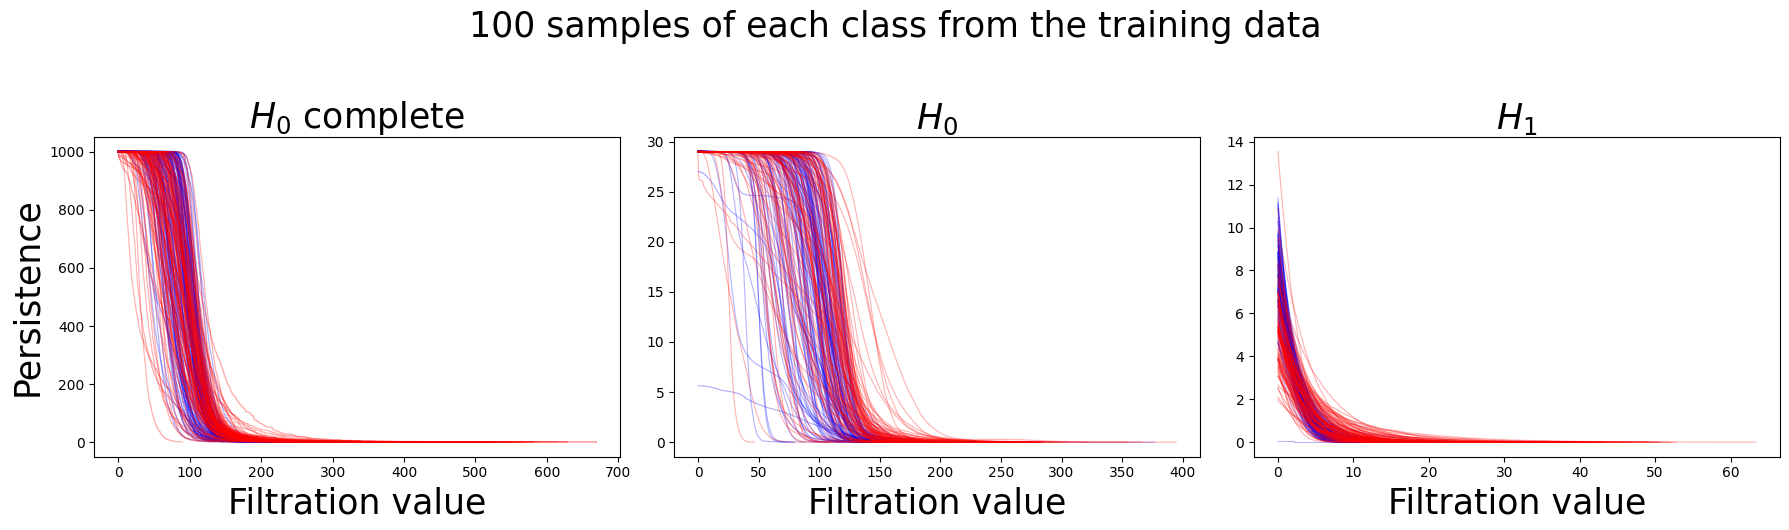

In [ ]:
num_of_samples = 100
idx_class0 = np.where(y_train == 0)[0]
idx_class1 = np.where(y_train == 1)[0]
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
keys = ["complete", "h0", "h1"]
titles = ["$H_0$ complete", "$H_0$", "$H_1$"]

fig.suptitle("100 samples of each class from the training data", fontsize=25, y=1.05)

np.random.seed(42)  # Reproducibility

for i, (key, ax, title) in enumerate(zip(keys, axes, titles)):
    data = {"complete": train_h0sr_complete, "h0": train_h0sr, "h1": train_h1sr}[key]
    idx0 = np.where(y_train == 0)[0]
    idx1 = np.where(y_train == 1)[0]
    sampled_idx0 = np.random.choice(idx0, size=num_of_samples, replace=False)
    sampled_idx1 = np.random.choice(idx1, size=num_of_samples, replace=False)
    
    for idx in sampled_idx0:
        data[idx].plot(ax=ax, color='blue', alpha=0.3, linewidth=0.8)
    for idx in sampled_idx1:
        data[idx].plot(ax=ax, color='red', alpha=0.3, linewidth=0.8)
    ax.set_title(title, fontsize=25)
    ax.set_xlabel("Filtration value", fontsize=25)
    if i == 0:
        ax.set_ylabel("Persistence", fontsize=25)
    else:
        ax.set_ylabel("", fontsize=25)

plt.tight_layout()
plt.show()




KeyboardInterrupt: 

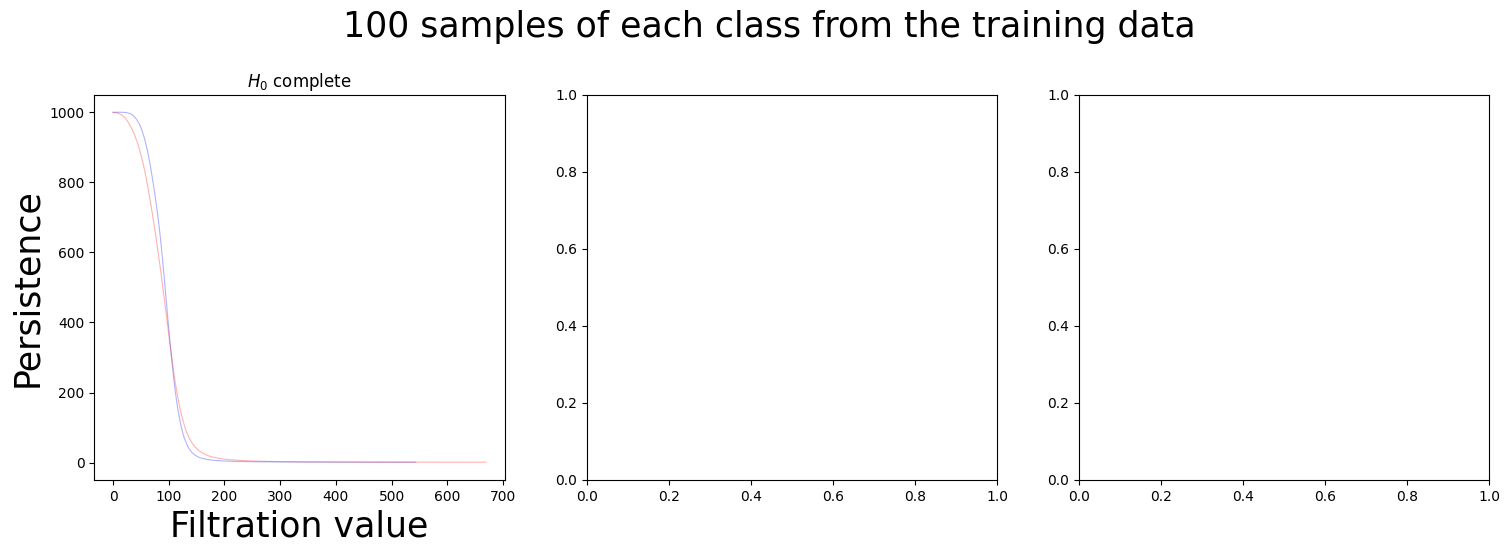

In [22]:
num_of_samples = 100
idx_class0 = np.where(y_train == 0)[0]
idx_class1 = np.where(y_train == 1)[0]
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
keys = ["complete", "h0", "h1"]
titles = ["$H_0$ complete", "$H_0$", "$H_1$"]

fig.suptitle("100 samples of each class from the training data", fontsize=25, y=1.05)

np.random.seed(42)  # Reproducibility

for i, (key, ax, title) in enumerate(zip(keys, axes, titles)):
    data = {"complete": train_h0sr_complete, "h0": train_h0sr, "h1": train_h1sr}[key]
    idx0 = np.where(y_train == 0)[0]
    idx1 = np.where(y_train == 1)[0]
    sampled_idx0 = np.random.choice(idx0, size=num_of_samples, replace=False)
    sampled_idx1 = np.random.choice(idx1, size=num_of_samples, replace=False)
    sum0 = 0
    sum1 = 0
    for idx in sampled_idx0:
        sum0 += data[idx]
    for idx in sampled_idx1:
        sum1 += data[idx]

    avg0 = sum0/num_of_samples
    avg1 = sum1/num_of_samples

    avg0.plot(ax=ax, color='blue', alpha=0.3, linewidth=0.8)
    avg1.plot(ax=ax, color='red', alpha=0.3, linewidth=0.8)

    ax.set_title(title)
    ax.set_xlabel("Filtration value", fontsize=25)
    if i == 0:
        ax.set_ylabel("Persistence", fontsize=25)
    else:
        ax.set_ylabel("")

plt.tight_layout()
plt.show()


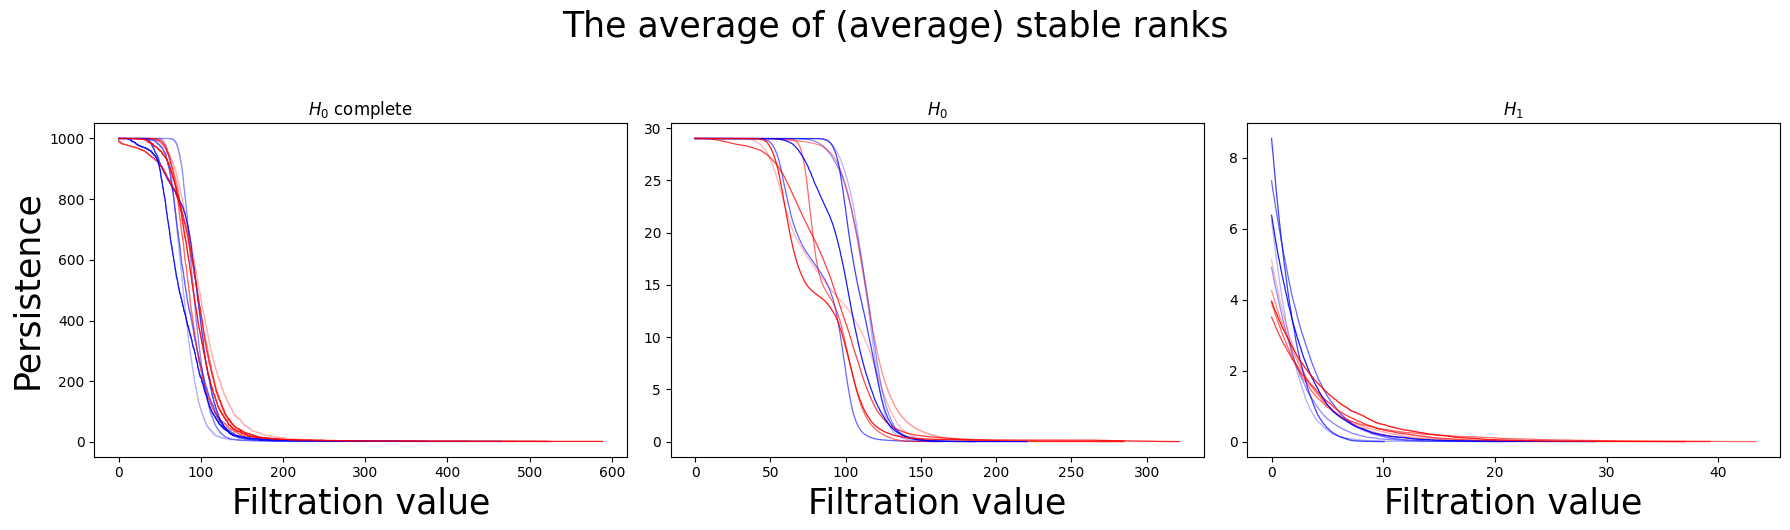

In [ ]:
# Split 100 samples per class into 5 batches of 20 and plot batch averages
import numpy as np
import matplotlib.pyplot as plt

num_of_samples = 10
num_batches = 5
batch_size = num_of_samples // num_batches

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
keys = ["complete", "h0", "h1"]
titles = ["$H_0$ complete", "$H_0$", "$H_1$"]
fig.suptitle("The average of (average) stable ranks", fontsize=25, y=1.05)


np.random.seed(42)  # Reproducibility

for i, (key, ax, title) in enumerate(zip(keys, axes, titles)):
    data = {"complete": train_h0sr_complete, "h0": train_h0sr, "h1": train_h1sr}[key]

    idx0 = np.where(y_train == 0)[0]
    idx1 = np.where(y_train == 1)[0]

    sampled_idx0 = np.random.choice(idx0, size=num_of_samples, replace=False)
    sampled_idx1 = np.random.choice(idx1, size=num_of_samples, replace=False)

    # Split into 5 equal batches of 20
    batches0 = np.split(sampled_idx0, num_batches)
    batches1 = np.split(sampled_idx1, num_batches)

    # Plot batch averages for class 0 (blue) and class 1 (red)
    alphas = [0.3, 0.45, 0.6, 0.75, 0.9]

    for b, (batch_idx0, batch_idx1) in enumerate(zip(batches0, batches1), start=1):
        # Class 0
        sum0 = 0
        for idx in batch_idx0:
            sum0 += data[idx]
        avg0 = sum0 / batch_size
        avg0.plot(ax=ax, color='blue', alpha=alphas[b-1], linewidth=0.9)

        # Class 1
        sum1 = 0
        for idx in batch_idx1:
            sum1 += data[idx]
        avg1 = sum1 / batch_size
        avg1.plot(ax=ax, color='red', alpha=alphas[b-1], linewidth=0.9)

    ax.set_title(title, fontsize=25)
    ax.set_xlabel("Filtration value", fontsize=25)
    if i == 0:
        ax.set_ylabel("Persistence", fontsize=25)
    else:
        ax.set_ylabel("")

# Single legend referencing labels from the first subplot only
handles, labels = axes[0].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, loc='upper center', ncol=5, fontsize=9, frameon=False)

plt.tight_layout()
plt.show()



In [ ]:

import stablerank.srank as sr
from scipy.spatial.distance import cdist, pdist, squareform

ds = [sr.Distance(squareform(pdist(X_train[i], "euclidean"))) for i in range(10)]

hej
